# EDA and Preprocessing

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.feature_extraction import text
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler

import re
import requests
import time
import regex as re
from collections import Counter

from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from nltk.corpus import stopwords

In [2]:
# import cleaned dataset

df = pd.read_csv("../Data/GTA_clean.csv")

In [3]:
df.columns

Index(['business_id', 'name', 'city', 'state', 'stars', 'attributes',
       'categories', 'user_id', 'review_stars', 'text', 'year'],
      dtype='object')

In [4]:
df.shape

(304025, 11)

In [11]:
df.head()

,business_id,name,city,state,stars,attributes,categories,user_id,review_stars,text,year
0,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,3.0,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...",fd25NWbvLdNFJV_MoAljIg,4.0,Pretty solid vegan spot. Had a rice bowl there...,2017
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,3.0,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...",AyxTBqPJjYqlY55vfNfB2Q,5.0,"What a great spot for a delicious, healthy lun...",2015
2,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,3.0,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...",-KvhDluq5GhtiafY4xK2Sw,2.0,I really do love Bolt Fresh Bar. I've gone the...,2018
3,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,3.0,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...",75DUiVsWkGZRW--zySVORA,4.0,"The vibe: Clean, bright vegetarian take out!\n...",2014
4,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,3.0,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...",z23KjDT_pUtORz4ptHnUAg,2.0,I went here once to get the protein bowl and i...,2017


In [5]:
df['categories'].value_counts()

Chinese, Restaurants                                                                       4288
Italian, Restaurants                                                                       2904
Thai, Restaurants                                                                          2806
Restaurants, Chinese                                                                       2792
Restaurants, Korean                                                                        2685
                                                                                           ... 
Food, Fast Food, Restaurants                                                                  1
Chinese, Restaurants, Asian Fusion, Fast Food                                                 1
Restaurants, Fast Food, Sandwiches, Salad, Food                                               1
Breakfast & Brunch, Caterers, Sandwiches, Restaurants, Delis, Event Planning & Services       1
Middle Eastern, Pizza, Food, Restaurants

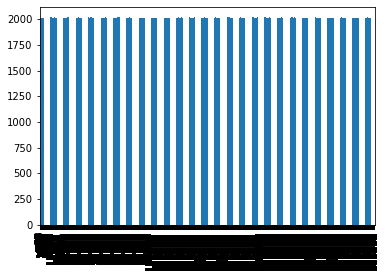

In [10]:
df['year', ].plot(kind = 'bar');

In [8]:
df['stars'].mean()

3.6361022942192256

In [9]:
df['review_stars'].mean()

3.630510648795329

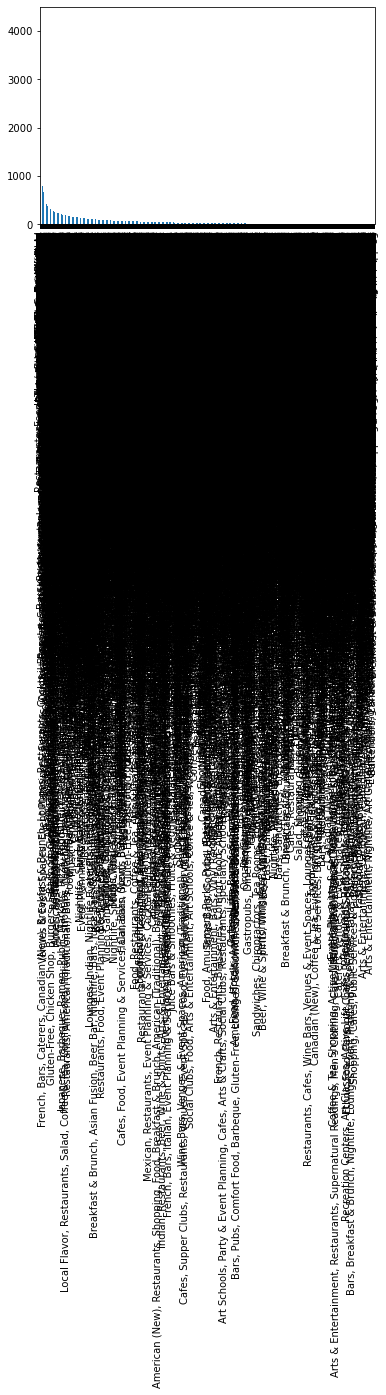

In [7]:
df['categories'].value_counts().plot(kind = 'bar');

In [ ]:
df = df.groupby('product').agg({'score':'mean', 'source':'size', 'text': ', '.join})
#change order of columns, create column from index values 
df = df.reindex_axis(['score','source','text'], axis=1).reset_index()
#set new column names
df.columns = ['product','mean_score','count','text_combined']
print (df)

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(df['stars'].mean());

In [ ]:
# Distribution of Types of Restaurant Categories 

restaurant_categories = df.assign(categories = business_final.categories.str.split(', ')).explode('categories')
top25_categories = restaurant_categories.categories.value_counts().head(7)

fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Top 5 Restaurant Categories in Toronto', fontsize=18)

# Excluding the top 2 most generic categories: Restaurants & Food

top25_categories[2:].plot(kind = 'bar', color = 'royalblue')

plt.ylabel('Number of Businesses in Toronto', fontsize=15)
plt.xlabel('Types of Restaurants', fontsize=15)
plt.xticks(rotation=65)

In [20]:
stop_words = text.ENGLISH_STOP_WORDS.union()

#Select only stars and text
reviews = df[['business_id', 'user_id', 'stars', 'text']]


stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

# data visualization for top 10 words the dataset
cvec = CountVectorizer()



In [ ]:
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    # Join the characters again to form the string.
     # Now just remove any stopwords

In [28]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return " ".join([word for word in nopunc.split() if word.lower() not in stop])
yelp_data['text'] = yelp_data['text'].apply(text_process)

/var/folders/3p/bdw7d11x76q9r29tng0s109c0000gn/T/ipykernel_8517/1305777860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data['text'] = yelp_data['text'].apply(text_process)


In [30]:
userid_df = yelp_data[['user_id','text']]
business_df = yelp_data[['business_id', 'text']]

In [31]:
userid_df = userid_df.groupby('user_id').agg({'text': ' '.join})
business_df = business_df.groupby('business_id').agg({'text': ' '.join})

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
#userid vectorizer
userid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
userid_vectors = userid_vectorizer.fit_transform(userid_df['text'])
#Business id vectorizer
businessid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
businessid_vectors = businessid_vectorizer.fit_transform(business_df['text'])

NameError: name 'WordPunctTokenizer' is not defined

In [27]:
userid_rating_matrix = pd.pivot_table(yelp_data, values='stars', index=['user_id'], columns=['business_id'])

In [ ]:
userid_df = yelp_data[['user_id','text']]
business_df = yelp_data[['business_id', 'text']]

In [ ]:
X = yelp_data[['user_id','text']]
y = yelp_data[['business_id', 'text']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

# Fit & transform the vectorizer 
Xcvec_train = cvec.fit_transform(X_train)

# Transform
Xcvec_test = cvec.transform(X_test)

In [ ]:

# for retail
Xcv_train_df = pd.DataFrame(Xcvec_train.toarray(), 
                          columns=cvec.get_feature_names())
Xcv_train_df.head()

# plot top occuring words
Xcv_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');

In [ ]:
train['is_retail'] = train['subreddit'].map({'talesfromtechsupport':0, 'TalesFromRetail':1})


In [ ]:
# set target dataframe
df_train = train[['is_retail', 'author', 'title_length', 'title_word_count', 'post']]

In [ ]:

retail['title_length'].hist();

In [ ]:
y8 = retail['title_length']
y9 = tech['title_length']
colors = ['b','g']

#plots the histogram
fig, ax9 = plt.subplots()
ax9.hist([y8,y9],color=colors)
ax9.set_xlim(0,150)
ax9.set_xlabel("Length")
ax9.set_ylabel("Count")
plt.title('Title Length in Subreddits')
plt.tight_layout()
plt.show()

In [ ]:
unique_users = df_train.drop(columns = ['title_length', 'title_word_count'])

In [ ]:
unique_users.drop_duplicates(subset = 'author', inplace = True)
unique_users.shape

In [ ]:

sns.pairplot(train[['title_length', 'title_word_count']])

In [ ]:

# display 'phone' in title
train[train['title'].str.lower().str.contains('phone')]

In [ ]:
df_train['is_retail'].value_counts(normalize=True)

In [ ]:

positive_words = ['positive', 'good', 'happy', 'great', 'love', 'beneficial', 'fun', 'cool', 'awesome']
negative_words = ['manager', 'fired', 'terrible', 'hate', 'garbage', 'horrendous', 'yuck', 'disaster']

In [ ]:

# convert created 'post' column to a list of strings:

text = list(df_train['post'])

# text[1] - coded out to reduce space

In [ ]:
# create first sentiment test
sent_senti = text[1]

In [ ]:
def simple_sentiment(sent_senti):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+')  
    # Tokenize text.
    tokens = tokenizer.tokenize(sent_senti.lower()) 
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    # Stem our positive/negative words.
    positive_stems = [p_stemmer.stem(i) for i in positive_words]
    negative_stems = [p_stemmer.stem(i) for i in negative_words]

    # Count "positive" words.
    positive_count = sum([1 for i in stemmed_words if i in positive_stems])
    # Count "negative" words
    negative_count = sum([1 for i in stemmed_words if i in negative_stems])
    
    # Calculate Sentiment Percentage 
    return round((positive_count - negative_count) / len(tokens), 5 )

In [ ]:

# Run our sentiment analyzer on our first sentence.
simple_sentiment(sent_senti)

#### on the retail dataset
X = retail['post']
y = retail['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

# Fit & transform the vectorizer 
Xcvec_train = cvec.fit_transform(X_train)

# Transform
Xcvec_test = cvec.transform(X_test)